In [1]:
# blanket import modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint
from scipy.stats import linregress

In [2]:
# setting up paths for data
happy_cs = "Output/happy_comb-data.csv"

In [3]:
happy_df = pd.read_csv(happy_cs)
happy_df

,RANK,Country,Happiness score,Explained by: Healthy life expectancy,Sunshine hours per Year,Average Income,Alcohol Consumption (L/year)
0,1,Finland,7.821,0.775,1858.00,18742.0,10.65
1,2,Denmark,7.636,0.777,1932.00,20304.0,10.13
2,3,Iceland,7.557,0.803,1326.00,19300.0,9.21
3,4,Switzerland,7.512,0.822,1932.75,25787.0,11.23
4,5,Netherlands,7.415,0.787,1662.00,19690.0,9.67
...,...,...,...,...,...,...,...
93,136,India,3.777,0.471,2517.02,1314.0,5.61
94,137,Zambia,3.760,0.306,2965.47,1045.0,4.46
95,138,Malawi,3.750,0.388,2795.87,733.0,4.08
96,139,Tanzania,3.702,0.425,3032.85,992.0,12.04


In [18]:
# Linear Regression Function
plt.style.use("ggplot")

def linear_regression(x_axis_lreg, y_axis_lreg, x_label, y_label, line_eq_x, line_eq_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_lreg, y_axis_lreg)
    regress_values = x_axis_lreg * slope + intercept
    line_eq = (f'y = {(round(slope,2))}x  + {(round(intercept,2))}')

    plt.scatter(x_axis_lreg, y_axis_lreg, marker = 'o', facecolor = 'cornflowerblue', edgecolor = 'black')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_axis_lreg, regress_values, 'r')
    plt.annotate(line_eq, (line_eq_x, line_eq_y), fontsize = 12, color = 'red', size = 14)
    plt.show
    
    correlation = st.pearsonr(x_axis_lreg, y_axis_lreg)
    print(f'The correlation between Happiness and {y_label} is {(round(correlation[0],2))}.')
    
#     print(f'The r-square value is: {round(rvalue**2,2)}.')

The correlation between Happiness and Average Income is 0.84.


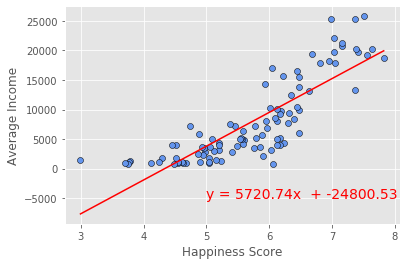

In [19]:
# Happiness by average income
# Q: Are countries with higher average incomes happier?

linear_regression(happy_df['Happiness score'], happy_df['Average Income'], 'Happiness Score', 'Average Income', 5, -5000)

The correlation between Happiness and Sunshine Hours per Year is -0.54.


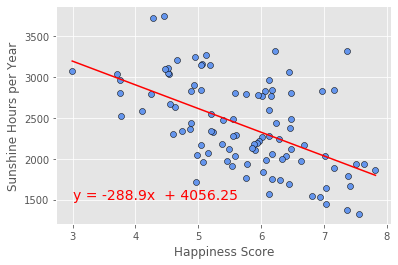

In [20]:
# Happiness by annual sunshine 
# Q: Does the weather of a country (av sunshine) influence happiness?
linear_regression(happy_df['Happiness score'], happy_df['Sunshine hours per Year'], 'Happiness Score', 'Sunshine Hours per Year', 3, 1500)

The correlation between Happiness and Healthy Life Expectancy is 0.78.


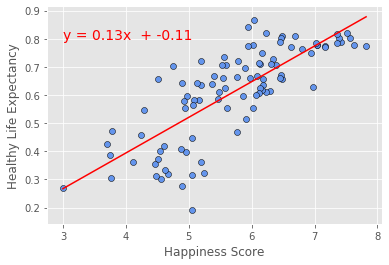

In [21]:
# Happiness by life expectancy
# Q: Are countries with longer life expectancies happier?
linear_regression(happy_df['Happiness score'], happy_df['Explained by: Healthy life expectancy'], 'Happiness Score', 'Healthy Life Expectancy', 3, 0.8)

The correlation between Happiness and Alcohol Consumption (L/year) is 0.56.


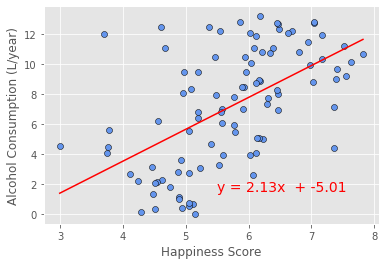

In [22]:
# Happiness by alcohol consumption
# Q: Does Alcohol Influence happiness?
linear_regression(happy_df['Happiness score'], happy_df['Alcohol Consumption (L/year)'], 'Happiness Score', 'Alcohol Consumption (L/year)', 5.5, 1.5)